# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 997 kB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 72.0 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 53.1 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 74.8 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 81.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 70.2 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 60.8 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 49.0 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 70.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 61.4 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 41.0 MB/s eta 0:00:01
     |██████████████████

## Imports

In [5]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
#pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 843 kB/s eta 0:00:01
     |████████████████████████████████| 215 kB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 22.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Define transforms
transform=transforms.Compose([transforms.ToTensor()])

# Create training set 
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
print("MNIST training set: ", len(train_data))

# Create test set 
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
print("MNIST testing set: ", len(test_data))

MNIST training set:  60000
MNIST testing set:  10000


In [10]:
# generate indices
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_data)),
    train_data.targets,
    stratify=train_data.targets,
    test_size= 0.1,
)

# generate a subset based on indices
train_split = Subset(train_data, train_indices)
val_split = Subset(train_data, val_indices)

# create loaders
train_loader = DataLoader(train_split, batch_size=32, shuffle=True)
val_loader = DataLoader(val_split, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print("MNIST train loader: ", len(train_loader))
print("MNIST validation loader: ", len(val_loader))
print("MNIST test loader: ", len(test_loader))

MNIST train loader:  1688
MNIST validation loader:  188
MNIST test loader:  313


In [11]:
data_iter= iter(train_loader)
images, labels= next(data_iter)
print("Image shape:", images.shape," --batch size:", len(images), "--image size:", images[0].shape)
print()
print("Labels:", labels, "--labels shape:", labels.shape, "--label batch size:", len(labels))

Image shape: torch.Size([32, 1, 28, 28])  --batch size: 32 --image size: torch.Size([1, 28, 28])

Labels: tensor([8, 3, 1, 7, 2, 6, 9, 2, 4, 9, 3, 1, 8, 6, 4, 6, 0, 8, 7, 1, 0, 8, 6, 4,
        8, 9, 0, 9, 4, 1, 0, 6]) --labels shape: torch.Size([32]) --label batch size: 32


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

No transformation other than toTensor() is used becuase function show5 didn't work with other kind of transformation.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [12]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


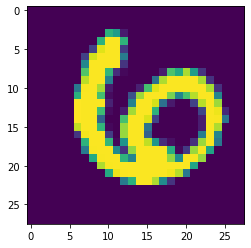

6


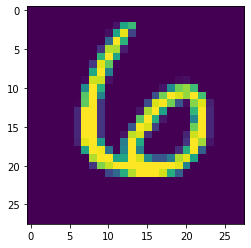

2


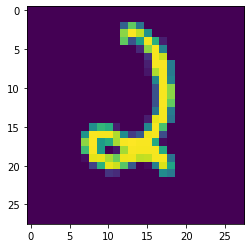

1


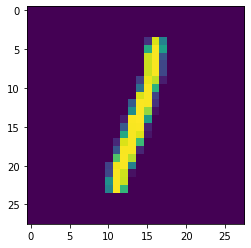

1


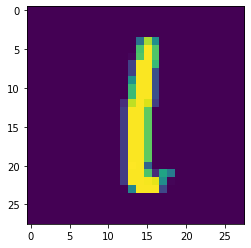

In [13]:
# Explore data
show5(train_loader)

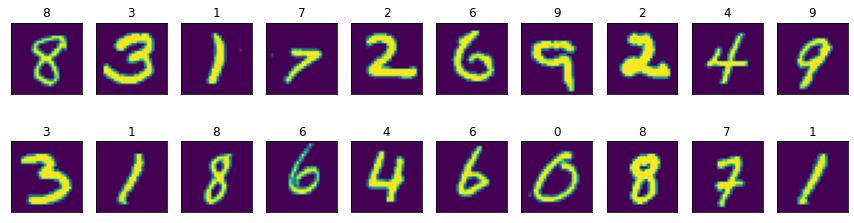

In [14]:
# Displaying images and labels of a batch
fig=plt.figure(figsize=(15,4))
for i in range(20):
    ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    plt.imshow(np.squeeze(images[i]))
    ax.set_title(labels[i].item())

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [15]:
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28 * 1, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
net = Net()
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [16]:
# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [17]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
                
        #modified part of train_correct
        ps = torch.exp(outputs).data 
        equality = (labels.data == ps.max(1)[1])
        train_correct += equality.type_as(torch.FloatTensor()).mean()
 
        #train_correct += (preds == labels).mean().item()
        train_loss += loss.item()
        
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
       #modifified part
        ps = torch.exp(outputs).data 
        equality = (labels.data == ps.max(1)[1])
        val_correct += equality.type_as(torch.FloatTensor()).mean()
     
        #val_correct += (preds == labels).mean().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader):.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))

Epoch 1 training accuracy: 0.93% training loss: 0.21860
Epoch 1 validation accuracy: 0.96% validation loss: 0.11918
Epoch 2 training accuracy: 0.97% training loss: 0.08707
Epoch 2 validation accuracy: 0.97% validation loss: 0.09944
Epoch 3 training accuracy: 0.98% training loss: 0.05913
Epoch 3 validation accuracy: 0.97% validation loss: 0.09724
Epoch 4 training accuracy: 0.99% training loss: 0.04349
Epoch 4 validation accuracy: 0.98% validation loss: 0.09192
Epoch 5 training accuracy: 0.99% training loss: 0.03572
Epoch 5 validation accuracy: 0.97% validation loss: 0.09662
Epoch 6 training accuracy: 0.99% training loss: 0.02649
Epoch 6 validation accuracy: 0.98% validation loss: 0.09104
Epoch 7 training accuracy: 0.99% training loss: 0.02363
Epoch 7 validation accuracy: 0.97% validation loss: 0.10564
Epoch 8 training accuracy: 0.99% training loss: 0.02305
Epoch 8 validation accuracy: 0.98% validation loss: 0.10151
Epoch 9 training accuracy: 0.99% training loss: 0.01861
Epoch 9 validati

Plot the training loss (and validation loss/accuracy, if recorded).

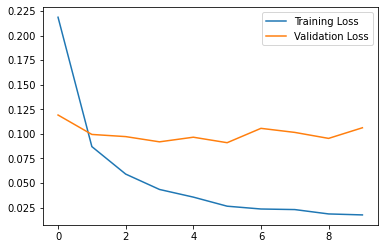

In [18]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [19]:
net.eval()
accuracy = 0
test_loss = 0
for imgs, labels in iter(test_loader):
    imgs =  imgs.to(device)
    labels = labels.to(device)

        
    output = net(imgs)
    test_loss += criterion(output, labels)
    ps = torch.exp(output).data 
    equality = (labels.data == ps.max(1)[1])
    accuracy += equality.type_as(torch.FloatTensor()).mean()

print( f"Test loss: {test_loss/len(test_loader):.3f}.. "
       f"Test accuracy: {accuracy/len(test_loader):.3f}")

Test loss: 0.108.. Test accuracy: 0.978


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [31]:
#using different learning rate 
model2 = Net()
model2.to(device)
optimizer = optim.Adam(model2.parameters(), lr=0.00001)

In [32]:
#train the model

num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    model2.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
                
        #modified part of train_correct
        ps = torch.exp(outputs).data 
        equality = (labels.data == ps.max(1)[1])
        train_correct += equality.type_as(torch.FloatTensor()).mean()
 
        #train_correct += (preds == labels).mean().item()
        train_loss += loss.item()
        
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    val_loss = 0.0
    val_correct = 0
    model2.eval()
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model2(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
       #modifified part
        ps = torch.exp(outputs).data 
        equality = (labels.data == ps.max(1)[1])
        val_correct += equality.type_as(torch.FloatTensor()).mean()
     
        #val_correct += (preds == labels).mean().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader):.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))

Epoch 1 training accuracy: 0.72% training loss: 1.48381
Epoch 1 validation accuracy: 0.85% validation loss: 0.75018
Epoch 2 training accuracy: 0.87% training loss: 0.56831
Epoch 2 validation accuracy: 0.88% validation loss: 0.46414
Epoch 3 training accuracy: 0.89% training loss: 0.41472
Epoch 3 validation accuracy: 0.90% validation loss: 0.38381
Epoch 4 training accuracy: 0.90% training loss: 0.35772
Epoch 4 validation accuracy: 0.91% validation loss: 0.34430
Epoch 5 training accuracy: 0.91% training loss: 0.32570
Epoch 5 validation accuracy: 0.91% validation loss: 0.31971
Epoch 6 training accuracy: 0.91% training loss: 0.30407
Epoch 6 validation accuracy: 0.92% validation loss: 0.30292
Epoch 7 training accuracy: 0.92% training loss: 0.28724
Epoch 7 validation accuracy: 0.92% validation loss: 0.28952
Epoch 8 training accuracy: 0.92% training loss: 0.27337
Epoch 8 validation accuracy: 0.93% validation loss: 0.27751
Epoch 9 training accuracy: 0.93% training loss: 0.26117
Epoch 9 validati

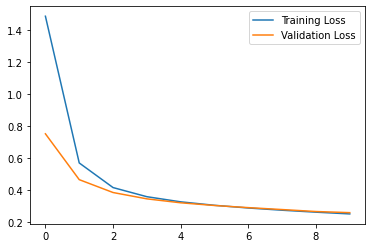

In [33]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [35]:
model2.eval()
accuracy = 0
test_loss = 0
for imgs, labels in iter(test_loader):
    imgs =  imgs.to(device)
    labels = labels.to(device)

        
    output = model2(imgs)
    test_loss += criterion(output, labels)
    ps = torch.exp(output).data 
    equality = (labels.data == ps.max(1)[1])
    accuracy += equality.type_as(torch.FloatTensor()).mean()

print( f"Test loss: {test_loss/len(test_loader):.3f}.. "
       f"Test accuracy: {accuracy/len(test_loader):.3f}")

Test loss: 0.241.. Test accuracy: 0.932


In [37]:
#using SGD optimizer
model3 = Net()
model3.to(device)
optimizer = optim.SGD(model3.parameters(), lr=0.001, momentum=0)


#train the model

num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    model3.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
                
        #modified part of train_correct
        ps = torch.exp(outputs).data 
        equality = (labels.data == ps.max(1)[1])
        train_correct += equality.type_as(torch.FloatTensor()).mean()
 
        #train_correct += (preds == labels).mean().item()
        train_loss += loss.item()
        
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    val_loss = 0.0
    val_correct = 0
    model3.eval()
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model3(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
       #modifified part
        ps = torch.exp(outputs).data 
        equality = (labels.data == ps.max(1)[1])
        val_correct += equality.type_as(torch.FloatTensor()).mean()
     
        #val_correct += (preds == labels).mean().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader):.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))

Epoch 1 training accuracy: 0.25% training loss: 2.26579
Epoch 1 validation accuracy: 0.42% validation loss: 2.21972
Epoch 2 training accuracy: 0.54% training loss: 2.13726
Epoch 2 validation accuracy: 0.63% validation loss: 2.02502
Epoch 3 training accuracy: 0.68% training loss: 1.82914
Epoch 3 validation accuracy: 0.73% validation loss: 1.59017
Epoch 4 training accuracy: 0.75% training loss: 1.31735
Epoch 4 validation accuracy: 0.78% validation loss: 1.07477
Epoch 5 training accuracy: 0.80% training loss: 0.91191
Epoch 5 validation accuracy: 0.82% validation loss: 0.78712
Epoch 6 training accuracy: 0.83% training loss: 0.70486
Epoch 6 validation accuracy: 0.84% validation loss: 0.64023
Epoch 7 training accuracy: 0.85% training loss: 0.59365
Epoch 7 validation accuracy: 0.86% validation loss: 0.55578
Epoch 8 training accuracy: 0.86% training loss: 0.52506
Epoch 8 validation accuracy: 0.87% validation loss: 0.50222
Epoch 9 training accuracy: 0.87% training loss: 0.47894
Epoch 9 validati

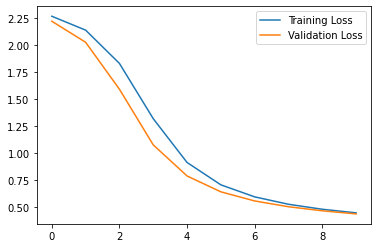

In [38]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [39]:
model3.eval()
accuracy = 0
test_loss = 0
for imgs, labels in iter(test_loader):
    imgs =  imgs.to(device)
    labels = labels.to(device)

        
    output = model3(imgs)
    test_loss += criterion(output, labels)
    ps = torch.exp(output).data 
    equality = (labels.data == ps.max(1)[1])
    accuracy += equality.type_as(torch.FloatTensor()).mean()

print( f"Test loss: {test_loss/len(test_loader):.3f}.. "
       f"Test accuracy: {accuracy/len(test_loader):.3f}")

Test loss: 0.416.. Test accuracy: 0.887


The model already have high accuracy of 98%, and using different optimizer or different hyper parameterers didn't give any improvement on training the model.

## Saving your model
Using `torch.save`, save your model for future loading.

In [40]:
torch.save(net.state_dict(), 'model.pth')